In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [14]:
dataset = pd.read_csv('./datasets/Algerian_forest_fires_dataset.csv')

In [4]:
dataset.head(2)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire


In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


In [8]:
dataset.isnull().sum()

day            1
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
dtype: int64

In [11]:
dataset[dataset.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [15]:
dataset.loc[:121,'Region']=0

In [19]:
dataset.loc[125:, 'Region']=1

In [20]:
dataset.iloc[120:128]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0.0
121,30,9,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0.0
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
124,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,NaN
125,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1.0
126,2,6,2012,30,73,13,4,55.7,2.7,7.8,0.6,2.9,0.2,not fire,1.0
127,3,6,2012,29,80,14,2,48.7,2.2,7.6,0.3,2.6,0.1,not fire,1.0


In [25]:
dataset = dataset.drop(dataset.index[122:125], axis=0)

In [26]:
dataset.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
201,16,8,2012,40,41,10,0.1,92,22.6,65.1,9.5,24.2,14.8,fire,1.0
208,23,8,2012,36,43,16,0,91.2,46.1,137.7,11.5,50.2,24.5,fire,1.0
169,15,7,2012,34,45,17,0,90.5,18,24.1,10.9,17.7,14.1,fire,1.0
141,17,6,2012,31,69,17,4.7,62.2,3.9,8,1.1,3.8,0.4,not fire,1.0
30,1,7,2012,29,68,19,1,59.9,2.5,8.6,1.1,2.9,0.4,not fire,0.0


In [27]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          244 non-null    object 
 1   month        244 non-null    object 
 2   year         244 non-null    object 
 3   Temperature  244 non-null    object 
 4    RH          244 non-null    object 
 5    Ws          244 non-null    object 
 6   Rain         244 non-null    object 
 7   FFMC         244 non-null    object 
 8   DMC          244 non-null    object 
 9   DC           244 non-null    object 
 10  ISI          244 non-null    object 
 11  BUI          244 non-null    object 
 12  FWI          244 non-null    object 
 13  Classes      243 non-null    object 
 14  Region       244 non-null    float64
dtypes: float64(1), object(14)
memory usage: 30.5+ KB


In [28]:
df = dataset

In [29]:
df.Region = df.Region.astype('int')

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          244 non-null    object
 1   month        244 non-null    object
 2   year         244 non-null    object
 3   Temperature  244 non-null    object
 4    RH          244 non-null    object
 5    Ws          244 non-null    object
 6   Rain         244 non-null    object
 7   FFMC         244 non-null    object
 8   DMC          244 non-null    object
 9   DC           244 non-null    object
 10  ISI          244 non-null    object
 11  BUI          244 non-null    object
 12  FWI          244 non-null    object
 13  Classes      243 non-null    object
 14  Region       244 non-null    int64 
dtypes: int64(1), object(14)
memory usage: 30.5+ KB


In [36]:
df = df.dropna().reset_index(drop=True)

In [37]:
df.sample(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
164,13,7,2012,39,45,13,0.6,85.2,11.3,10.4,4.2,10.9,4.7,fire,1
120,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3,0.1,not fire,0
28,29,6,2012,32,47,13,0.3,79.9,18.4,84.4,2.2,23.8,3.9,not fire,0
78,18,8,2012,36,54,18,0,89.4,20,110.9,9.7,27.5,16.1,fire,0
8,9,6,2012,25,88,13,0.2,52.9,7.9,38.8,0.4,10.5,0.3,not fire,0


In [39]:
df.columns = df.columns.str.strip()
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [40]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype('int')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [44]:
for col in [feature for feature in df.columns if df[feature].dtype=='O']:
    if col != 'Classes': 
        df[col]=df[col].astype('float')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [48]:
df.to_csv('./datasets/cleaned.csv', index=False)

### EDA

In [50]:
df_copy = df

In [51]:
df = df.drop(['day', 'month', 'year'], axis=1)
df.sample(4)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
98,31,71,17,0.3,69.6,3.2,30.1,1.5,5.1,0.6,not fire,0
212,30,59,19,0.0,89.1,27.8,168.2,9.8,39.3,19.4,fire,1
78,36,54,18,0.0,89.4,20.0,110.9,9.7,27.5,16.1,fire,0
229,34,44,12,0.0,92.5,25.2,63.3,11.2,26.2,17.5,fire,1


In [52]:
df.Classes.value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [56]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)

In [57]:
df.sample(3)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
91,28,80,21,16.8,52.5,8.7,8.7,0.6,8.3,0.3,0,0
80,35,68,19,0.0,88.3,25.9,130.6,8.8,34.7,16.8,1,0
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1


In [58]:
df_copy.sample(1)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
219,7,9,2012,31,62,15,0.0,83.3,5.8,17.7,3.8,6.4,3.2,fire,1


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 [Text(1, 0, '7'),
  Text(2, 0, '8'),
  Text(3, 0, '9'),
  Text(4, 0, ''),
  Text(5, 0, ''),
  Text(6, 0, ''),
  Text(7, 0, ''),
  Text(8, 0, ''),
  Text(9, 0, ''),
  Text(10, 0, ''),
  Text(11, 0, ''),
  Text(12, 0, '')])

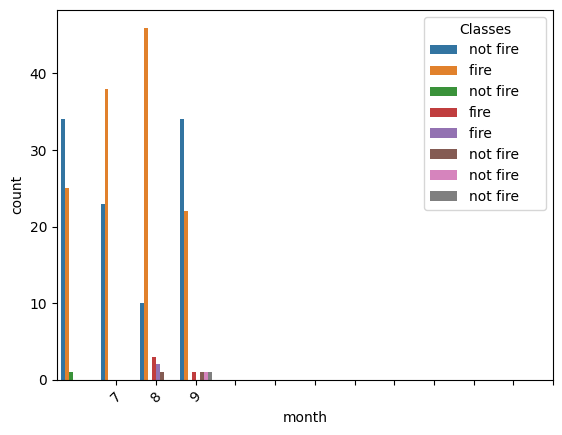

In [67]:
sns.countplot(data=df_copy, x='month', hue='Classes')
plt.xticks(range(1,13))
plt.xticks(rotation=45)


## Model Training

In [68]:
df.sample(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
139,33,62,10,8.7,65.5,4.6,8.3,0.9,4.4,0.4,0,1
81,36,58,19,0.0,88.6,29.6,141.1,9.2,38.8,18.4,1,0


In [70]:
X = df.drop(['FWI'], axis=1)
y = df['FWI']

In [71]:
from sklearn.model_selection import train_test_split

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Feature Selection

In [74]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


-> Threshold: (corr(F1, F2)) >= 0.90 then drop any one column

In [112]:
def correlation(data, threshold):
    corr = data.corr()
    cols = data.columns 
    drop_cols = set()
    for i in range(0, len(cols)):
        for j in range(0,i): 
            if(abs(corr.iloc[i,j])>=threshold):
                drop_cols.add(cols[i])
    return drop_cols

In [114]:
corr_cols = correlation(X_train, 0.85)
corr_cols

{'BUI', 'DC'}

In [115]:
X_train.drop(corr_cols, axis=1, inplace=True, errors='ignore')
X_test.drop(corr_cols, axis=1, inplace=True, errors='ignore')

In [105]:
X_train.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
97,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0,0
141,31,72,14,0.2,60.2,3.8,8.0,0.8,3.7,0,1


In [116]:
X_train.columns

Index(['Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'ISI', 'Classes',
       'Region'],
      dtype='object')

### Standardization

In [117]:
from sklearn.preprocessing import StandardScaler

In [118]:
scaler = StandardScaler()

In [119]:
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train) 
X_test_scaled = scaler.transform(X_test)

Text(0.5, 1.0, 'After Scaling')

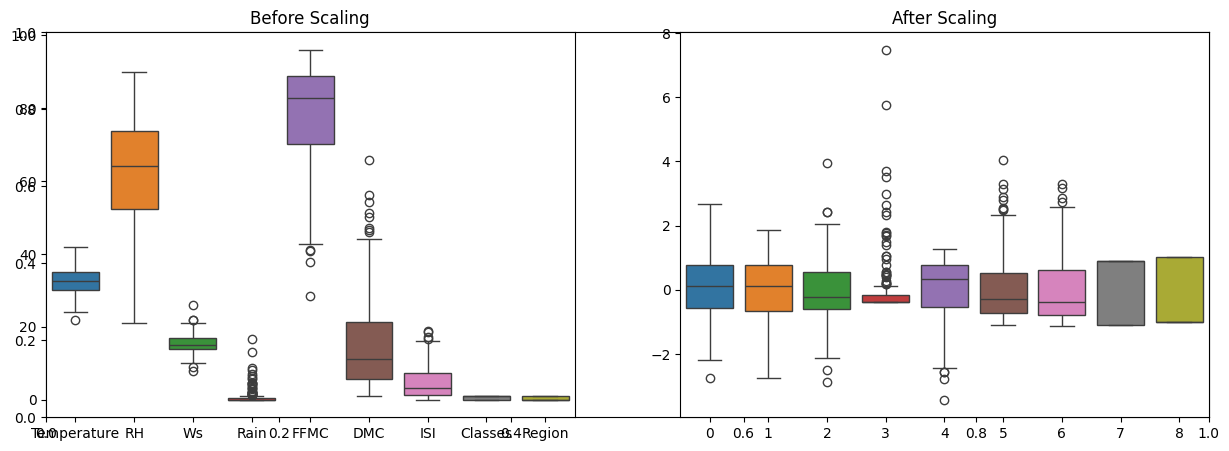

In [121]:
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1) 
sns.boxplot(data=X_train) 
plt.title('Before Scaling')
plt.subplot(1,2,2) 
sns.boxplot(data=X_train_scaled) 
plt.title('After Scaling')

### Training

In [122]:
from sklearn.linear_model import Ridge

In [124]:
ridge = Ridge()

In [125]:
ridge.fit(X_train_scaled, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [126]:
y_pred = ridge.predict(X_test_scaled)

In [127]:
from sklearn.metrics import r2_score

In [128]:
print(r2_score(y_test, y_pred))

0.9842993364555512


## Dumping Models

In [131]:
import os 
import pickle

In [132]:
os.makedirs('./models', exist_ok=True)

In [133]:
pickle.dump(scaler, open('./models/scaler.pkl', 'wb'))
pickle.dump(ridge, open('./models/ridge.pkl', 'wb'))